In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
df=pd.read_csv("rohini_1016.csv").iloc[:,1:]

In [118]:
df.head()

,rohini,local_time
0,50.0,2019-07-19 00:00:00
1,55.0,2019-07-19 01:00:00
2,41.0,2019-07-19 02:00:00
3,42.0,2019-07-19 03:00:00
4,33.0,2019-07-19 04:00:00


In [119]:
len(df)

1776

## 12時間ごとの平均を取る  
(例)  
2019/07/19 00:00:00 ~ 12:00:00 までの平均を取り、データフレーム を作成

In [123]:
value_list=[]
time_list=[]
row=0
for i in range(int(len(df)/12)-1):
    value=df.iloc[row : row+12,:].mean()
    value_list.append(value)
    time=df.iloc[row+12:row+13,:]["local_time"].values[0]
    time_list.append(time)
    row=row+12

In [124]:
df_6hours=pd.DataFrame(value_list, time_list).reset_index()
df_6hours.columns=["local_time", "rohini"]

In [149]:
df_6hours.isnull().sum()

local_time    0
rohini        1
dtype: int64

In [150]:
df_6hours.head()

,local_time,rohini
0,2019-07-19 12:00:00,58.500000
1,2019-07-20 00:00:00,64.333333
2,2019-07-20 12:00:00,49.666667
3,2019-07-21 00:00:00,42.583333
4,2019-07-21 12:00:00,45.000000


In [126]:
df_6hours.to_csv("rohini_1016_6hours.csv")

In [127]:
f=lambda x:datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

df_6hours["local_time"]=df_6hours["local_time"].apply(f)

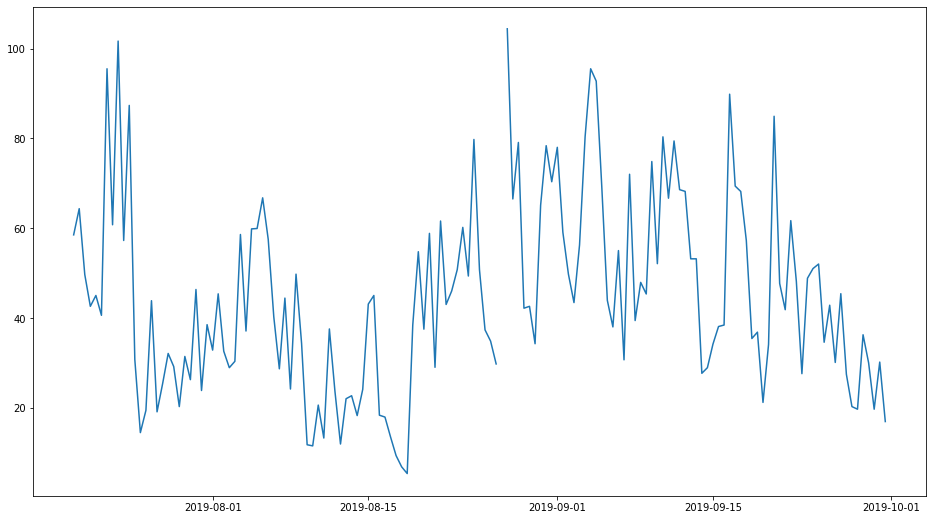

In [128]:
ts=df_6hours["rohini"]
ts.index=df_6hours["local_time"]

plt.figure(figsize=(16,9))
plt.plot(ts)
plt.show()